## 1. About The project:

TBD

### The dataset
Sources: https://www.kaggle.com/datasets/rohitudageri/credit-card-details/


Description of the columns:

Features name: (Credit_Card.csv)
- Ind_ID: Client ID
- Gender: Gender information
- Car_owner: Having car or not
- Propert_owner: Having property or not
- Children: Count of children
- Annual_income: Annual income
- Type_Income: Income type
- Education: Education level
- Marital_status: Marital_status
- Housing_type: Living style
- Birthday_count: Use backward count from current day (0), -1 means yesterday.
- Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.
- Mobile_phone: Any mobile phone
- Work_phone: Any work phone
- Phone: Any phone number
- EMAIL_ID: Any email ID
- Type_Occupation: Occupation
- Family_Members: Family size


Another data set (Credit_card_label.csv) contains two key pieces of information
- ID: The joining key between application data and credit status data, same is Ind_ID
- Label: 0 is application approved and 1 is application rejected.


## 2. Import libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [2]:
#load dataframe
df_without_label = pd.read_csv("../data/Credit_card.csv")
df_label = pd.read_csv("../data/Credit_card_label.csv")

### Merge Dataframe

In [3]:
#merge df and df_label
df = pd.merge(df_without_label, df_label, how='inner')

In [14]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Format all of the columns to lowercase

In [4]:
df.columns = df.columns.str.lower()

In [140]:
df

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


## 3. Exploratory Data Analysis
- Basic EDA
    - check data type of the columns, is correctly classified based on the data
    - check missing value, and think about method to handle it
    - Target variable
        - Check whether is class imbalance?
    - Check cardinality of categorical columns
    - Feature Engineering for Birthday count and Employed Days

In [141]:
#Check data type is correct?
df.dtypes

ind_id               int64
gender              object
car_owner           object
propert_owner       object
children             int64
annual_income      float64
type_income         object
education           object
marital_status      object
housing_type        object
birthday_count     float64
employed_days        int64
mobile_phone         int64
work_phone           int64
phone                int64
email_id             int64
type_occupation     object
family_members       int64
label                int64
dtype: object

In [142]:
df_head = df.head(2).T
df_head.insert(loc=0,column='dtype',value=list(df.dtypes.values))
df_head

,dtype,0,1
ind_id,int64,5008827,5009744
gender,object,M,F
car_owner,object,Y,Y
propert_owner,object,Y,N
children,int64,0,0
annual_income,float64,180000.0,315000.0
type_income,object,Pensioner,Commercial associate
education,object,Higher education,Higher education
marital_status,object,Married,Married
housing_type,object,House / apartment,House / apartment


**Conclusion** : All of the columns seem fine.

In [143]:
#Check for missing values
df.isnull().sum()

ind_id               0
gender               7
car_owner            0
propert_owner        0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
birthday_count      22
employed_days        0
mobile_phone         0
work_phone           0
phone                0
email_id             0
type_occupation    488
family_members       0
label                0
dtype: int64

In [5]:
#handle null values
df.dropna(subset=["gender", "annual_income", "birthday_count"], inplace=True)
df["type_occupation"] = df["type_occupation"].fillna("unidentified")


**Conclusion** : Im goin to drop null values in column where null values less than 30, and replace null values in type_occupation with string: unidentified

the reason behind it, i dont wanna lose 30% of my data if im drop null values based on type_occupation, 488 data in type_occupation has null values.

In [43]:
df.isnull().sum()

ind_id             0
gender             0
car_owner          0
propert_owner      0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
birthday_count     0
employed_days      0
mobile_phone       0
work_phone         0
phone              0
email_id           0
type_occupation    0
family_members     0
label              0
dtype: int64

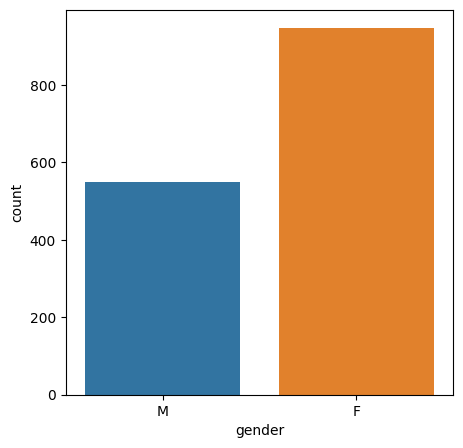

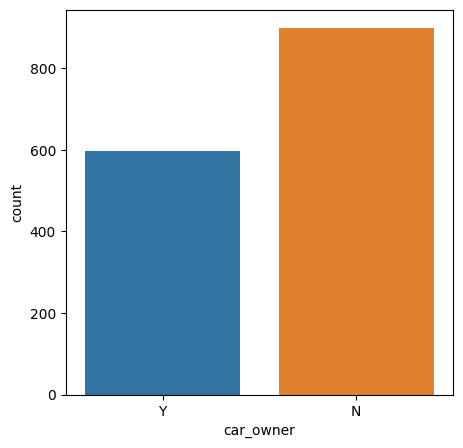

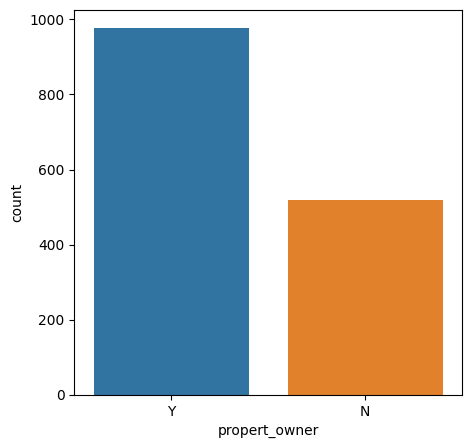

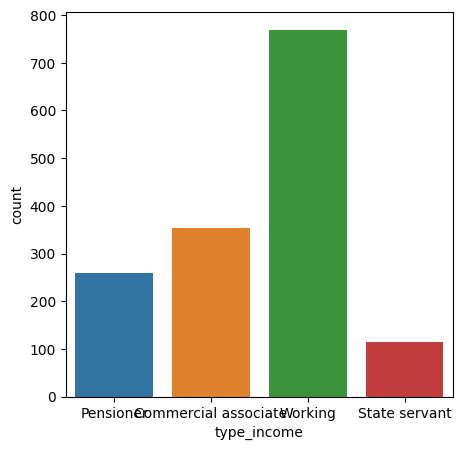

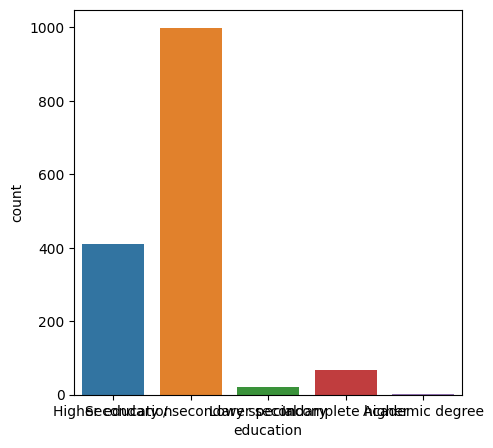

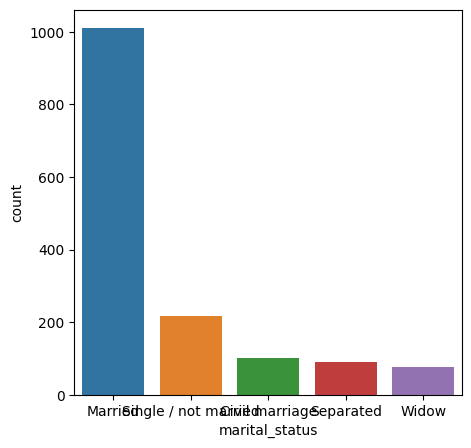

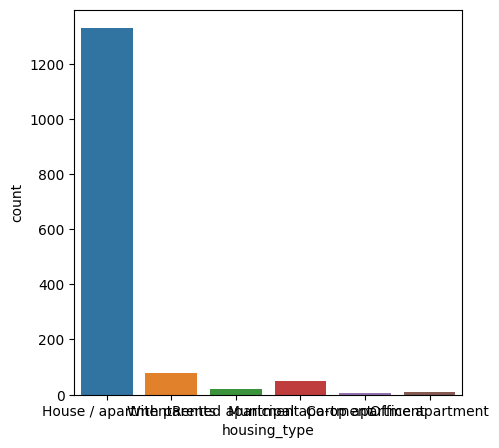

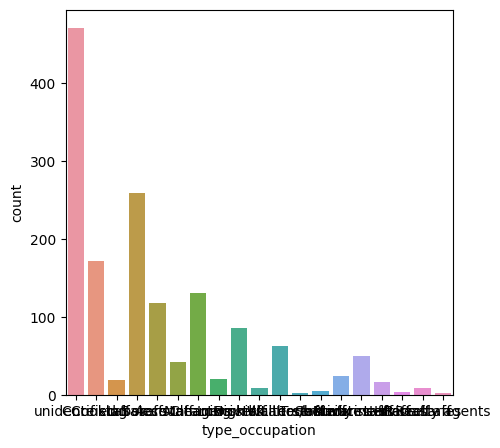

In [114]:
# Plot object columns
object_col = list(df.columns[df.dtypes == "object"])
for i, col in enumerate(object_col):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    sns.countplot(data=df, x=col)
    plt.show()
    

In [6]:
## Check target column distribution label, is it imbalance or balance class
df.label.value_counts(normalize=True)

label
0    0.893048
1    0.106952
Name: proportion, dtype: float64

**Conclusion**: we can see label 0 is more than 1, so we can say this dataframe has imbalance class, for modelling we are going to use roc and auc score for classification metric

In [122]:
#check cardinality of categorical columns
df[object_col].describe().T

,count,unique,top,freq
gender,1496,2,F,947
car_owner,1496,2,N,898
propert_owner,1496,2,Y,977
type_income,1496,4,Working,769
education,1496,5,Secondary / secondary special,998
marital_status,1496,5,Married,1011
housing_type,1496,6,House / apartment,1331
type_occupation,1496,19,unidentified,471


In [145]:
df.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,unidentified,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,unidentified,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,unidentified,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,unidentified,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,unidentified,2,1


**Conclusion**: The cardinality of categorical columns seem ok, lets use one hot encoding for modelling.

In [7]:
# Feature Engineering for birthday count and employed days

df["age"] = -df["birthday_count"] // 365
df["employee_status"] = df['employed_days'].apply(lambda x: 1 if x > 0 else 0)

df = df.drop(columns=['ind_id', 'birthday_count', 'employed_days'], axis=1).reset_index(drop=True)

In [8]:
df

,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,mobile_phone,work_phone,phone,email_id,type_occupation,family_members,label,age,employee_status
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,unidentified,2,1,51.0,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,unidentified,2,1,37.0,0
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,unidentified,2,1,37.0,0
3,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,unidentified,2,1,37.0,0
4,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,unidentified,2,1,60.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,Drivers,3,0,30.0,0
1492,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,0,28.0,0
1493,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,36.0,0
1494,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,0,41.0,0


In [9]:
#Export clean data
df.to_csv("clean_data.csv", index=False)

Feature engineering
- df["age] = is age of the user
- df["employee_status] = 0 means Employed and 1 is unemployed

### Splitting data
Will do splitting data into Train (60%), val(20%), and test (20%)

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(f'train : {round(df_train.shape[0]/df.shape[0],2)}, val: {round(df_val.shape[0]/df.shape[0],2)}, test: {round(df_test.shape[0]/df.shape[0],2)}')


train : 0.6, val: 0.2, test: 0.2


In [9]:
y_train = df_train['label'].values
y_val = df_val['label'].values
y_test = df_test['label'].values

del df_train['label']
del df_val['label']
del df_test['label']

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## 4. Modeling

### Base Model: Logistic Regression
Will do modelling with LogisticRegression for base model with default parameter and evaluating the model using roc_auc_score(since imbalance class)

In [10]:
dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver='liblinear', random_state=42)

In [11]:
dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [12]:
dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)
y_pred = model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred)

print(f'The auc score for logistic regression model is {auc_score}')

The auc score for logistic regression model is 0.46960760712566196


Thoughts on logistic regression roc_auc_score: it seems that LR model does not perform well on the data, especially if the features data types is nominal or categorical, my rule of thumb if most of the features are nominal or categorical lets modelling with tree based model.

### Base Model: Random Forest Default Parameter

In [47]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc_score_rf = roc_auc_score(y_val, y_pred)

print(f'The auc score for random forest model is {auc_score_rf}')

The auc score for random forest model is 0.7610736639383726


See, random forest model gives a higher roc_auc_score than logistic regression model, im going to tunes the parameters to see if it can makes the good model.

### Tune Model: Random Forest with RandomSearchCV

In [186]:
def feature_extraction(df_train):
    df_tuned = df_train.copy()
    y_train_tune = df_tuned['label'].values
    del df_tuned['label']

    df_train_tune = df_tuned.reset_index(drop=True)

    dft = DictVectorizer(sparse=False)
    dict_tune = df_train_tune.to_dict(orient = 'records')
    X_train_tune = dft.fit_transform(dict_tune)

    return X_train_tune, y_train_tune

In [187]:
X_train_tune, y_train_tune = feature_extraction(df_full_train)

In [230]:
rf_tune = RandomForestClassifier()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
params = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [1, 3, 5, 2, 4],
    'min_samples_split': [3, 4, 6, 7, 8, 9, 2, 5, 10],
    'n_estimators': [100, 200, 400, 600, 300, 500, 700, 800, 900, 1000]
}
rs = RandomizedSearchCV(estimator=rf_tune, random_state=42, n_jobs=-1, n_iter=1000, scoring='roc_auc', param_distributions=params)
result = rs.fit(X_train_tune, y_train_tune)

In [231]:
means = result.cv_results_['mean_test_score']
params = result.cv_results_['params']

columns = ['model', 'means', 'params']
df_model = []

for mean, param in zip(means, params):
    score = {"model": "random forest tune", "means": mean, "params": param}
    df_model.append(score)
df_model = pd.DataFrame(df_model, columns=columns)

In [236]:
df_model.sort_values('means', ascending=False)

,model,means,params
615,random forest tune,0.742456,"{'n_estimators': 200, 'min_samples_split': 7, ..."
606,random forest tune,0.742421,"{'n_estimators': 100, 'min_samples_split': 3, ..."
773,random forest tune,0.742114,"{'n_estimators': 100, 'min_samples_split': 4, ..."
602,random forest tune,0.741337,"{'n_estimators': 100, 'min_samples_split': 2, ..."
398,random forest tune,0.741119,"{'n_estimators': 800, 'min_samples_split': 2, ..."
...,...,...,...
966,random forest tune,0.695233,"{'n_estimators': 100, 'min_samples_split': 2, ..."
40,random forest tune,0.694914,"{'n_estimators': 1000, 'min_samples_split': 4,..."
112,random forest tune,0.694051,"{'n_estimators': 100, 'min_samples_split': 4, ..."
574,random forest tune,0.690012,"{'n_estimators': 100, 'min_samples_split': 2, ..."


In [234]:
result_auc = result.cv_results_['mean_test_score'].max()
print(f'The mean of auc score for random forest model with tuning RandomSearchCV 5 fold is {result_auc}')


The mean of auc score for random forest model with tuning RandomSearchCV 5 fold is 0.7424560479038289


The score of RF + RS is lesser than RandomForest Default, it means that with random search with 1000 iter it cannot search an optimal parameter since its actually random of choice parameter

Let us have a look at various metrics like tp, tn, fp, fn, Precision, Recall, F1 score, TRP, FPR, AUC, Accuracy etc. to detemine which threshold should be used to make the decision on the prediction for random forest base model

In [17]:
import numpy as np
def all_metrics_dataframe(y_val,y_pred):
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        actual_positive = (y_val == 0)
        actual_negative = (y_val == 1)

        predicted_positive = (y_pred > t)
        predicted_negative = (y_pred <= t)

        tp = (actual_positive & predicted_positive).sum()
        tn = (actual_negative & predicted_negative).sum()
        fp = (predicted_positive & actual_negative).sum()
        fn = (predicted_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold','tp','fp','fn','tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    #'precision', 'recall', 'f1', 'tpr', 'fpr', 'auc', 'accuracy'

    df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
    df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['f1'] = 2 * (df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])
    df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])
    df_scores['tnr'] = df_scores['tn'] / (df_scores['tn'] + df_scores['fp'])
    df_scores['fnr'] = df_scores['fn'] / (df_scores['fn'] + df_scores['tp'])
    df_scores['auc'] = auc(df_scores['fpr'], df_scores['tpr'])
    df_scores['accuracy'] = (df_scores['tp'] + df_scores['tn'])/(df_scores['tp'] + df_scores['fp'] + df_scores['tn'] + df_scores['fn'])
        
    return df_scores

In [18]:
model_rf = RandomForestClassifier(random_state=42)
dv = DictVectorizer(sparse=False)

dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

model_rf.fit(X_train, y_train)
y_pred = model_rf.predict_proba(X_val)[:, 1]
y_pred

array([0.01      , 0.05      , 0.02      , 0.02916667, 0.05      ,
       0.03      , 0.2       , 0.15      , 0.24      , 0.03      ,
       0.14      , 0.03      , 0.09      , 0.13      , 0.01      ,
       0.05      , 0.04      , 0.71      , 0.01      , 0.02733333,
       0.06      , 0.        , 0.08      , 0.06      , 0.04      ,
       0.05      , 0.16      , 0.04      , 0.12      , 0.        ,
       0.275     , 0.05      , 0.1       , 0.03      , 0.02      ,
       0.48      , 0.1       , 0.07      , 0.02      , 0.04      ,
       0.191     , 0.04      , 0.11      , 0.02      , 0.08      ,
       0.04      , 0.2       , 0.12      , 0.01      , 0.02      ,
       0.18      , 0.08      , 0.05      , 0.22195238, 0.02      ,
       0.35      , 0.06      , 0.01      , 0.01      , 0.2       ,
       0.06      , 0.12      , 0.04      , 0.05333333, 0.02      ,
       0.31      , 0.04      , 0.08      , 0.2       , 0.03      ,
       0.02      , 0.7       , 0.0425    , 0.06      , 0.02   

In [19]:
df_all_score = all_metrics_dataframe(y_val, y_pred)

In [20]:
df_all_score

,threshold,tp,fp,fn,tn,precision,recall,f1,tpr,fpr,tnr,fnr,auc,accuracy
0,0.00,253,30,15,1,0.893993,0.944030,0.918330,0.944030,0.967742,0.032258,0.055970,0.208474,0.849498
1,0.01,238,30,30,1,0.888060,0.888060,0.888060,0.888060,0.967742,0.032258,0.111940,0.208474,0.799331
2,0.02,211,29,57,2,0.879167,0.787313,0.830709,0.787313,0.935484,0.064516,0.212687,0.208474,0.712375
3,0.03,189,28,79,3,0.870968,0.705224,0.779381,0.705224,0.903226,0.096774,0.294776,0.208474,0.642140
4,0.04,162,27,106,4,0.857143,0.604478,0.708972,0.604478,0.870968,0.129032,0.395522,0.208474,0.555184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.96,0,0,268,31,NaN,0.000000,NaN,0.000000,0.000000,1.000000,1.000000,0.208474,0.103679
97,0.97,0,0,268,31,NaN,0.000000,NaN,0.000000,0.000000,1.000000,1.000000,0.208474,0.103679
98,0.98,0,0,268,31,NaN,0.000000,NaN,0.000000,0.000000,1.000000,1.000000,0.208474,0.103679
99,0.99,0,0,268,31,NaN,0.000000,NaN,0.000000,0.000000,1.000000,1.000000,0.208474,0.103679


**Conclusion:***

Based on the threshold, for 0, it shows that the model will predict 15 false negatives case, but it predicts 30 false positives too. Since the data is imbalanced, it suggests that the model will predict all customer credit card applications as approved, even though there is 1 customer dissapprove

For a threshold of 1, the output is 268 false negatives and 0 false positives. It means we would predict the rest of the 

In an ideal scenario, we want 0 false positives and 0 false negatives, but nothing is perfect. Therefore, we are going to choose the nearest perfect threshold for this model by take a look to the data score, which threshold had the most true positive value and true negative, the answer is we dont need threshold since 0 is the best



In [21]:
import plotly.express as px
fig = px.line(df_all_score, x="threshold", y=["auc","accuracy","f1","precision","recall"])
fig.show()

In [22]:
fig = px.line(df_all_score, x="threshold", y=["fp","fn"])
fig.show()

In [26]:
df_all_score.query('threshold== 0.00')

,threshold,tp,fp,fn,tn,precision,recall,f1,tpr,fpr,tnr,fnr,auc,accuracy
0,0.0,253,30,15,1,0.893993,0.94403,0.91833,0.94403,0.967742,0.032258,0.05597,0.208474,0.849498


## 5. Dump The Best Model: Random Forest

In [57]:
import pickle
model_name = f'model.bin'
with open(model_name, 'wb') as f_out:
    pickle.dump((model_rf, dv), f_out)

## 6. Summary
- Tree models learn through if-then-else rules, IMO making them more suitable for categorical features compared to logistic regression.
- Sometimes, parameter tuning may not be very helpful if your data is trash. I mean, just take a look at my data, and feature engineering won't help either. :'(
